In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Carga del dataset
df = pd.read_csv("Video_Game_Sales_as_of_Jan_2017.csv")

### 1. Análisis exploratorio

In [3]:
#Primeras filas del dataset
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


In [4]:
#Revisión de información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17416 entries, 0 to 17415
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17416 non-null  object 
 1   Platform         17416 non-null  object 
 2   Year_of_Release  17408 non-null  float64
 3   Genre            17416 non-null  object 
 4   Publisher        17415 non-null  object 
 5   NA_Sales         17416 non-null  float64
 6   EU_Sales         17416 non-null  float64
 7   JP_Sales         17416 non-null  float64
 8   Other_Sales      17416 non-null  float64
 9   Global_Sales     17416 non-null  float64
 10  Critic_Score     8336 non-null   float64
 11  Critic_Count     8336 non-null   float64
 12  User_Score       7798 non-null   float64
 13  User_Count       7798 non-null   float64
 14  Rating           10252 non-null  object 
dtypes: float64(10), object(5)
memory usage: 2.0+ MB


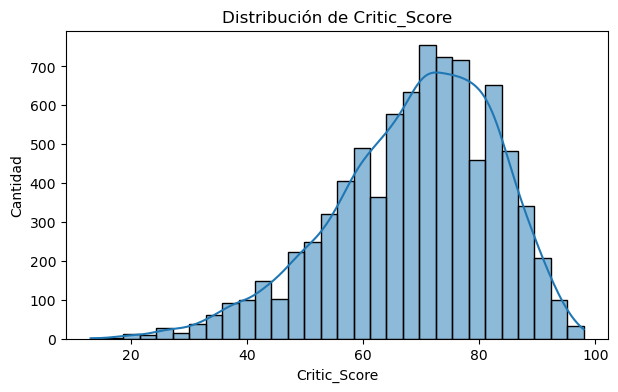

In [5]:
#Distribución de Critic_Score
plt.figure(figsize=(7,4))
sns.histplot(df["Critic_Score"], bins=30, kde=True)
plt.title("Distribución de Critic_Score")
plt.xlabel("Critic_Score")
plt.ylabel("Cantidad")
plt.show()

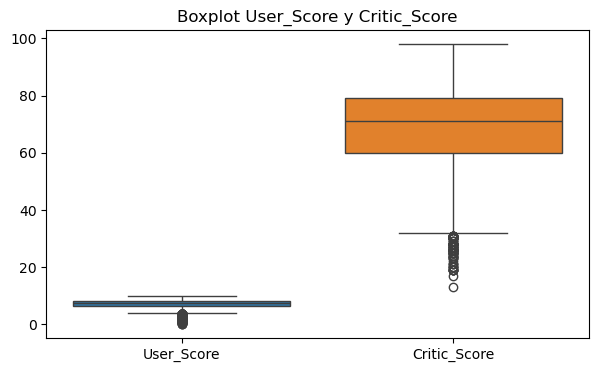

In [6]:
#Boxplot de User_Score y Critic_Score
plt.figure(figsize=(7,4))
sns.boxplot(data=df[["User_Score","Critic_Score"]])
plt.title("Boxplot User_Score y Critic_Score")
plt.show()

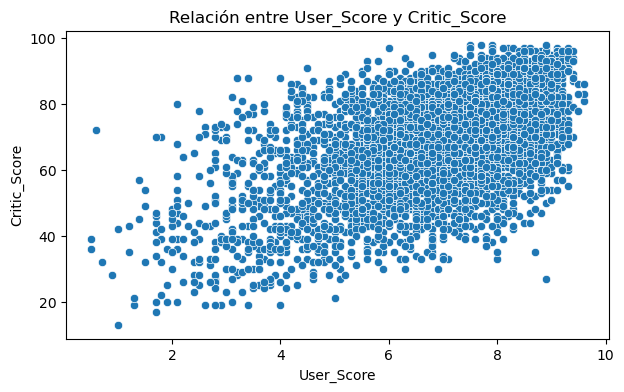

In [7]:
#Gráfico de dispersión entre User_Score y Critic_Score
plt.figure(figsize=(7,4))
sns.scatterplot(x=df["User_Score"], y=df["Critic_Score"])
plt.xlabel("User_Score")
plt.ylabel("Critic_Score")
plt.title("Relación entre User_Score y Critic_Score")
plt.show()

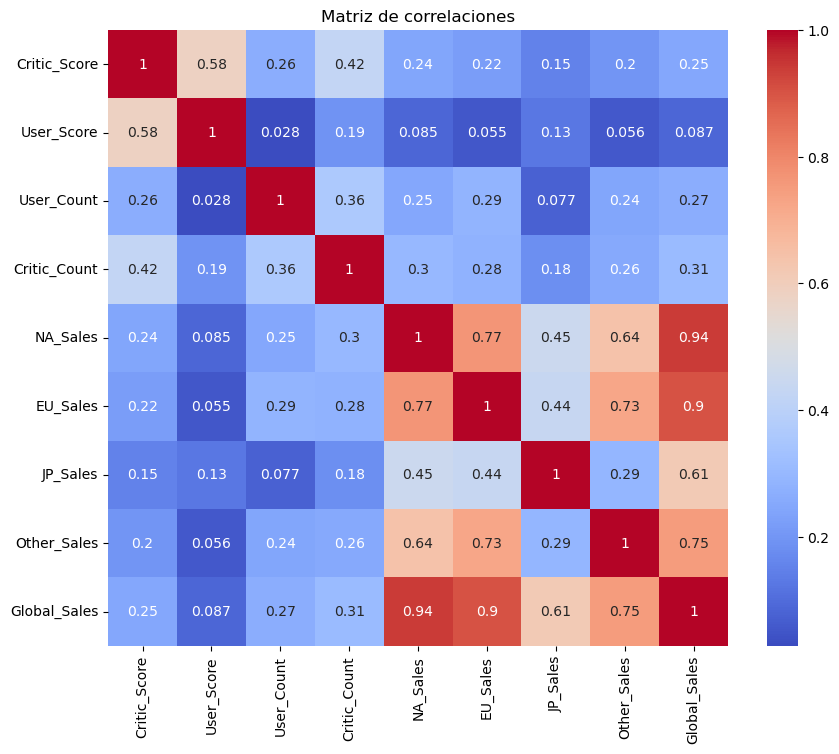

In [8]:
#Correlación entre variables numéricas
corr = df[["Critic_Score", "User_Score", "User_Count", "Critic_Count", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de correlaciones")
plt.show()

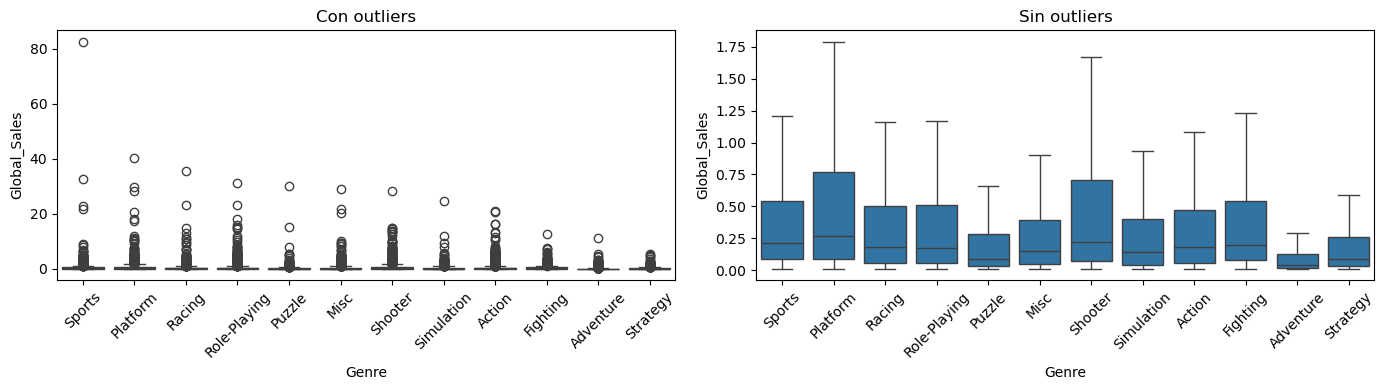

In [9]:
#Boxplot de Global_Sales por Genre con y sin outliers
fig, axes = plt.subplots(1, 2, figsize=(14,4))
sns.boxplot(x="Genre", y="Global_Sales", data=df, ax=axes[0])
axes[0].set_title("Con outliers")
axes[0].tick_params(axis='x', rotation=45)
sns.boxplot(x="Genre", y="Global_Sales", data=df, showfliers=False, ax=axes[1])
axes[1].set_title("Sin outliers")
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

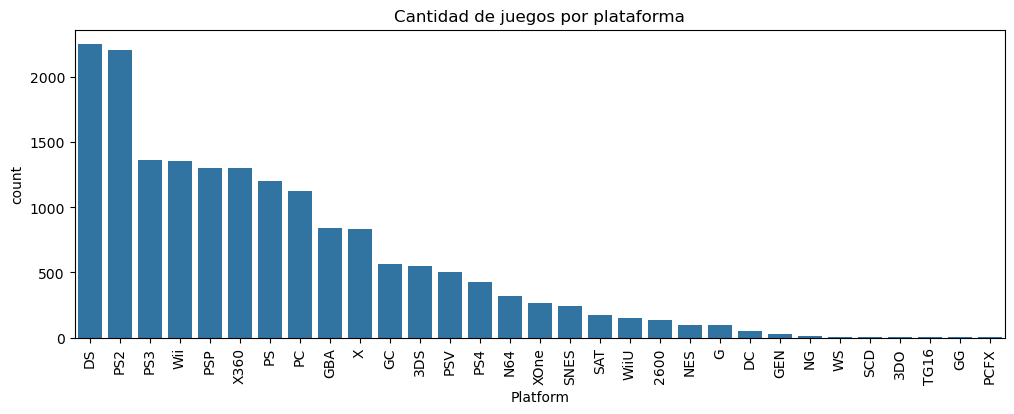

In [10]:
#Distribución de juegos por plataforma
plt.figure(figsize=(12,4))
sns.countplot(x="Platform", data=df, order=df["Platform"].value_counts().index)
plt.title("Cantidad de juegos por plataforma")
plt.xticks(rotation=90)
plt.show()

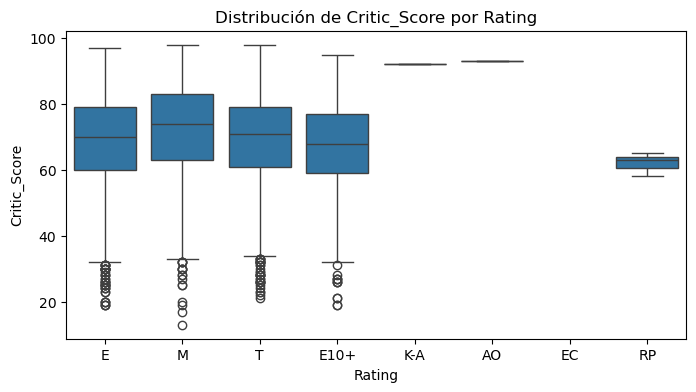

In [11]:
#Distribución de Critic_Score por Rating
plt.figure(figsize=(8,4))
sns.boxplot(x="Rating", y="Critic_Score", data=df)
plt.title("Distribución de Critic_Score por Rating")
plt.show()

### 2. Limpiamos la base eliminando valores nulos

In [12]:
df = df[df["User_Score"] != 'tdt']
df["User_Score"] = pd.to_numeric(df["User_Score"], errors="coerce")
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7112 entries, 0 to 17407
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             7112 non-null   object 
 1   Platform         7112 non-null   object 
 2   Year_of_Release  7112 non-null   float64
 3   Genre            7112 non-null   object 
 4   Publisher        7112 non-null   object 
 5   NA_Sales         7112 non-null   float64
 6   EU_Sales         7112 non-null   float64
 7   JP_Sales         7112 non-null   float64
 8   Other_Sales      7112 non-null   float64
 9   Global_Sales     7112 non-null   float64
 10  Critic_Score     7112 non-null   float64
 11  Critic_Count     7112 non-null   float64
 12  User_Score       7112 non-null   float64
 13  User_Count       7112 non-null   float64
 14  Rating           7112 non-null   object 
dtypes: float64(10), object(5)
memory usage: 889.0+ KB


## Modelo 1: Regresión Lineal

In [14]:
#Creación de variable con los 15 publishers más frecuentes
top_publishers = df["Publisher"].value_counts().nlargest(15).index
df["Publisher"] = df["Publisher"].apply(lambda x: x if x in top_publishers else "Other")

#Transformación logarítmica de ventas
for col in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']:
    df[f"{col}_log"] = np.log1p(df[col])

#Cálculo de la edad del juego
df["Game_Age"] = 2025 - df["Year_of_Release"]

In [22]:
#Selección de features relevantes
features = [
    'Platform', 'Genre', 'Publisher', 'NA_Sales_log', 'EU_Sales_log', 'JP_Sales_log',
    'Other_Sales_log', 'User_Score', 'User_Count', 'Critic_Count', 'Rating', 'Game_Age'
]
target = "Critic_Score"

X = df[features]
y = df[target]

#Preprocesamiento con pipeline
numeric_features = ['NA_Sales_log', 'EU_Sales_log', 'JP_Sales_log', 'Other_Sales_log',
                   'User_Score', 'User_Count', 'Critic_Count', 'Game_Age']
categorical_features = ['Platform', 'Genre', 'Publisher', 'Rating']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

#Train y Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Validación cruzada
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

#Entrenamiento final
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Validación cruzada (R^2 promedio):", np.mean(scores))
print("MSE en test:", mean_squared_error(y_test, y_pred))
print("R^2 en test:", r2_score(y_test, y_pred))

Validación cruzada (R^2 promedio): -5.67179186544108e+19
MSE en test: 90.30657588505694
R^2 en test: 0.5407619517468599


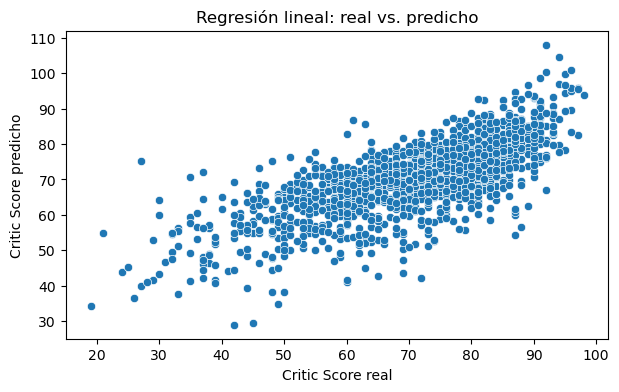

In [23]:
#Gráfico de dispersión de real vs. predicho
plt.figure(figsize=(7,4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Critic Score real")
plt.ylabel("Critic Score predicho")
plt.title("Regresión lineal: real vs. predicho")
plt.show()

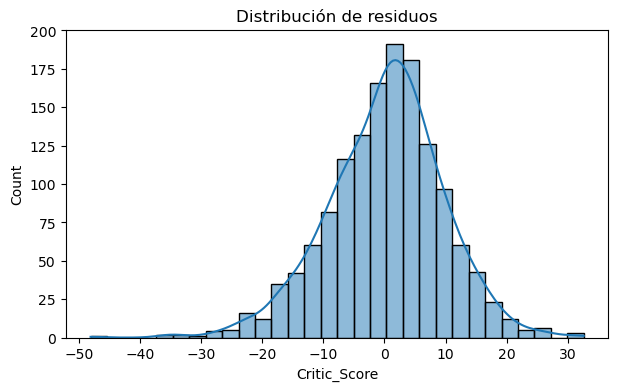

In [24]:
#Gráfico de la distribución de residuos
plt.figure(figsize=(7,4))
residuos = y_test - y_pred
sns.histplot(residuos, bins=30, kde=True)
plt.title("Distribución de residuos")
plt.show()